<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Vridhi_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

So what can we Expect at the end of the project:

In order to understand our data, we can look at each of the colums and try to understand their meaning and to find that which sheet will help us to extract the relevance to the problem. I know this is time-consuming, but it will give us the flavour of our datasets.

From the following Datasheets we extracted the following datas:

1.Deliveries: This file helped us to extract the data that .which bowler delievered what type of ball in the specific over during the match

2.Matches: This file extract the data related to which teams were playing in which city and which teams won against the other team with what no of runs and the date the match was played in presence of which umpires.

3.Most run Average Runrate: This file describes the data that which playered played the number of balls and how many time they got out and the number of runs they scored and hence there average run rate for the season.

4.Players: The given excel sheet describes the players related information like what country is the player from what is there batting hand and what is the bowling skill they have.

5.Teams: Which are the teams who have participated in the IPL season.

6.Teams_home_and_away: This shares the data related to the home wins and away wins of the teams participating and the percentage of the same.

When we flaunt around this data sheets it helps us to find each of the following data in some or the other way, We at the end of our Project Expect the following Outputs:
1. The captain of the team performing best

2. No of matches played by a player

3. The player who scored heighest no of boundaries

4. The best opening players

5. Experience of the Player in the perticular team and the past IPL tournament

6. Total number of wickets taken by the bowler in the tornament

7. The average run rate of the player during the entire tournament

8. The best team and there chances to win the tournament

9. The teams that have the chances to enter the semi-finale by analysis of     there players

10. Which venue has the heighest runs history

11. The desired run rate during the second innings

12. The number of wide balls thrown by the bowler

13. The number of No balls thrown by the bowler

14. The chances of toss and hence the extra over.




Conclusion

That's it! We are here at the end of our exercise.

Throughout this Process we put in practice many of the strategies to get our desired output. We analysed each and every data sheets so as to get the desired outputs related to teams, there performance, the players and there performances, to find the best batsman the best bowlers the no of boundaries etc. we analysed which team players are the best for bowling and which are best for batting alone, we dealt with permutation and combinations to find out the desired outputs related to boundaries. That's a lot of work that Python helped us make easier.

But whatever it is we can not define which team will help us win because at the end the players here are not a machine and the performance of the players either improve by practice or decreases due to some other factors so we can only analyse the past data. Now all we can do is Analyse and see the performance to increase or decrease because Sports is something that doesn't only depend upon the players but also many other factors ex.Climatic Condition. So, we will see you in next IPL....

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Input file path 
path = '/content/drive/MyDrive/Capstone project /'
# individual data frame
players_df = pd.read_excel(path + 'Players.xlsx')
deliveries_df = pd.read_csv(path + 'deliveries.csv')
matches_df = pd.read_csv(path + 'matches.csv')
teams_df = pd.read_csv(path + 'teams.csv')
most_runs_average_strikerate_df = pd.read_csv(path + 'most_runs_average_strikerate.csv')
teamwise_home_and_away_df = pd.read_csv(path + 'teamwise_home_and_away.csv')

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
team_winner_df = matches_df['winner']

In [ ]:
team_loosing_df= matches_df[]

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 756, dtype: object

In [ ]:
def the_lossing_team(team1,team2,winner):
  if team1!=winner:
    return team1
  else:
    return team2

In [ ]:
the_teamcomparison_df= matches_df.copy()
the_teamcomparison_df['loosing team']=the_teamcomparison_df.apply(lambda x:the_lossing_team(x['team1'],x['team2'],x['winner']),axis=1)
the_teamcomparison_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,loosing team
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Royal Challengers Bangalore
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Mumbai Indians
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Gujarat Lions
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Rising Pune Supergiant
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Delhi Daredevils


In [ ]:
the_teamcomparison_df=the_teamcomparison_df.groupby(['winner','loosing team'])['result'].count().reset_index()

In [ ]:
the_team_vs_team_df= teams_df.copy()
the_team_vs_team_df.rename(columns={'team1':'teams'},inplace=True)
the_team_vs_team_df

,teams
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [ ]:
teams_list= the_team_vs_team_df['teams']
for team in teams_list:
  the_team_vs_team_df[team]=0
the_team_vs_team_df=the_team_vs_team_df.set_index('teams')

In [ ]:
the_teamcomparison_df

,winner,loosing team,result
0,Chennai Super Kings,Deccan Chargers,6
1,Chennai Super Kings,Delhi Capitals,3
2,Chennai Super Kings,Delhi Daredevils,12
3,Chennai Super Kings,Kings XI Punjab,12
4,Chennai Super Kings,Kochi Tuskers Kerala,1
...,...,...,...
135,Sunrisers Hyderabad,Mumbai Indians,7
136,Sunrisers Hyderabad,Pune Warriors,2
137,Sunrisers Hyderabad,Rajasthan Royals,6
138,Sunrisers Hyderabad,Rising Pune Supergiants,1


In [ ]:
for value in range(len(the_teamcomparison_df)):
  the_team_vs_team_df[the_teamcomparison_df.iloc[value]['winner']][the_teamcomparison_df.iloc[value]['loosing team']]=the_teamcomparison_df.iloc[value]['result']
  

In [ ]:
the_team_vs_team_df

,Pune Warriors,Kolkata Knight Riders,Rajasthan Royals,Kochi Tuskers Kerala,Gujarat Lions,Chennai Super Kings,Rising Pune Supergiants,Delhi Daredevils,Deccan Chargers,Delhi Capitals,Mumbai Indians,Sunrisers Hyderabad,Rising Pune Supergiant,Royal Challengers Bangalore,Kings XI Punjab
teams,,,,,,,,,,,,,,,
Pune Warriors,0,4,4,0,0,4,0,3,3,0,5,2,0,5,3
Kolkata Knight Riders,1,0,10,2,3,13,0,8,2,2,19,7,1,10,8
Rajasthan Royals,1,10,0,1,0,14,0,7,2,2,10,6,0,8,9
Kochi Tuskers Kerala,1,0,1,0,0,1,0,1,1,0,0,0,0,2,1
Gujarat Lions,0,1,0,0,0,0,0,3,0,0,2,5,1,3,2
Chennai Super Kings,2,7,7,1,0,0,0,6,4,0,17,3,0,8,9
Rising Pune Supergiants,0,2,0,0,2,0,0,0,0,0,1,1,0,2,1
Delhi Daredevils,2,13,11,1,1,12,2,0,4,0,11,8,0,14,13
Deccan Chargers,1,7,7,0,0,6,0,7,0,0,6,0,0,5,7


Text(0.5, 1.0, 'The Comparison between teams')

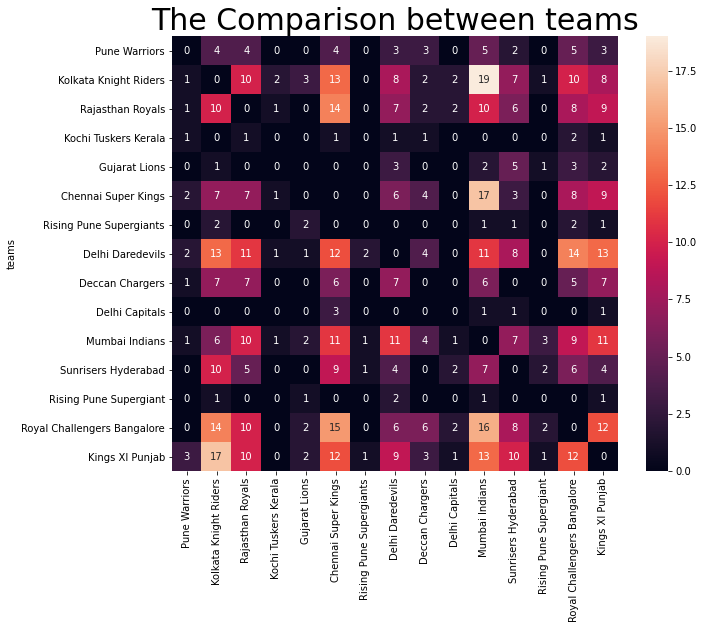

In [ ]:
fig, axis=plt.subplots(figsize=(10,8))
sns.heatmap(the_team_vs_team_df,annot=True)
axis.set_title("The Comparison between teams",size=30)